# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Imports
import pickle
import csv
import operator

import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.contrib.layers import flatten

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from utils import *

# autoreload plugin
# this will automatically update the imported modules with the changes made on the fly in the functions.py script
%load_ext autoreload
%autoreload 2

In [3]:
# Download the German Traffic Sign Recognition Benchmark dataset train and test sets
from urllib.request import urlretrieve
from os.path import isfile
from tqdm import tqdm

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('train.p'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Train Dataset') as pbar:
        urlretrieve(
            'https://s3.amazonaws.com/udacity-sdc/datasets/german_traffic_sign_benchmark/train.p',
            'train.p',
            pbar.hook)

if not isfile('test.p'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Test Dataset') as pbar:
        urlretrieve(
            'https://s3.amazonaws.com/udacity-sdc/datasets/german_traffic_sign_benchmark/test.p',
            'test.p',
            pbar.hook)

print('Training and Test data downloaded.')

Training and Test data downloaded.


In [4]:
# Load the data 
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

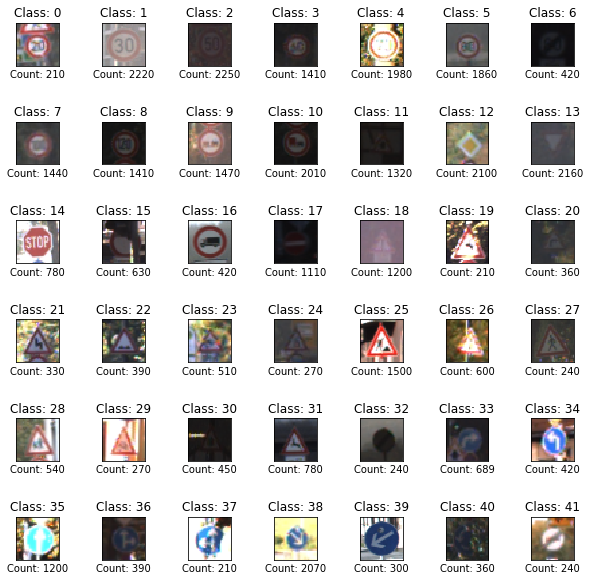

In [8]:
# Display a random image for each unique label, and the count. 
images, labels, counts = get_images_and_counts(X_train, list(y_train), group_classes(y_train).items())
plot_signs(images, labels, counts)

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,     0.,   780.,
          630.,   420.,  1110.,  1200.,   210.,   360.,   330.,   390.,
          510.,   270.,  1500.,   600.,   240.,     0.,   540.,   270.,
          450.,   780.,   240.,   689.,   420.,  1200.,   390.,   210.,
         2070.,   300.,   360.,   240.,   240.]),
 array([  0.        ,   0.93333333,   1.86666667,   2.8       ,
          3.73333333,   4.66666667,   5.6       ,   6.53333333,
          7.46666667,   8.4       ,   9.33333333,  10.26666667,
         11.2       ,  12.13333333,  13.06666667,  14.        ,
         14.93333333,  15.86666667,  16.8       ,  17.73333333,
         18.66666667,  19.6       ,  20.53333333,  21.46666667,
         22.4       ,  23.33333333,  24.26666667,  25.2       ,
         26.13333333,  27.06666667,  28.        ,  28.93333333,
         29.86666667,  30.8       ,  31.73333333,  32.66666667,
         33.6 

(array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
         480.,  660.,  420.,  690.,  720.,    0.,  270.,  210.,  150.,
         360.,  390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,
         180.,   60.,    0.,  150.,   90.,  150.,  270.,   60.,  210.,
         120.,  390.,  120.,   60.,  690.,   90.,   90.,   60.,   90.]),
 array([  0.        ,   0.93333333,   1.86666667,   2.8       ,
          3.73333333,   4.66666667,   5.6       ,   6.53333333,
          7.46666667,   8.4       ,   9.33333333,  10.26666667,
         11.2       ,  12.13333333,  13.06666667,  14.        ,
         14.93333333,  15.86666667,  16.8       ,  17.73333333,
         18.66666667,  19.6       ,  20.53333333,  21.46666667,
         22.4       ,  23.33333333,  24.26666667,  25.2       ,
         26.13333333,  27.06666667,  28.        ,  28.93333333,
         29.86666667,  30.8       ,  31.73333333,  32.66666667,
         33.6       ,  34.53333333,  35.46666667,  36.4       ,
   

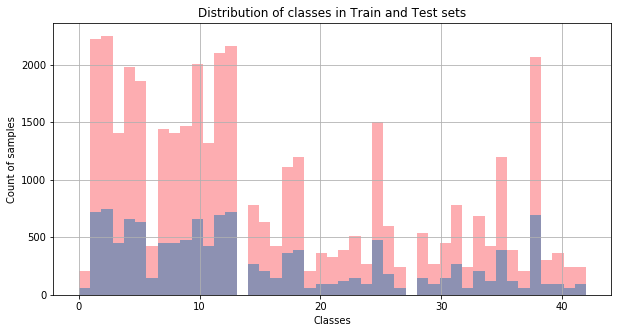

In [9]:
# Let's look at the distributions of classes in the train and test sets:
plt.figure(1, figsize=(10, 5))
plt.hist(y_train, 45, alpha = 0.5, color='#FD5C64')
plt.hist(y_test, 45, alpha = 0.5)
plt.xlabel('Classes')
plt.ylabel('Count of samples')
plt.title('Distribution of classes in Train and Test sets')
plt.grid(True)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
# Let's look at the count of images per class
counts = {}

for i in range(len(y_train)):
    cls = str(y_train[i])
    if cls not in counts:
        counts[cls] = 1
    else:
        counts[cls] += 1
print(counts)

{'34': 420, '5': 1860, '18': 1200, '39': 300, '22': 390, '8': 1410, '20': 360, '29': 270, '35': 1200, '27': 240, '0': 210, '15': 630, '4': 1980, '11': 1320, '3': 1410, '26': 600, '41': 240, '42': 240, '36': 390, '28': 540, '14': 780, '31': 780, '40': 360, '17': 1110, '32': 240, '33': 689, '12': 2100, '24': 270, '7': 1440, '9': 1470, '25': 1500, '21': 330, '37': 210, '23': 510, '30': 450, '38': 2070, '1': 2220, '2': 2250, '19': 210, '13': 2160, '6': 420, '10': 2010, '16': 420}


In [6]:
# Step 1: Normalizes using Mix-Max    
X_train_norm = min_max_normalization(X_train)
X_test_norm = min_max_normalization(X_test)

# Step 2: One-Hot-Encoding the Y label
y_train, y_test = one_hot_encoding(y_train, y_test)

### Split Data into Training and Validation Sets

In [7]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Shuffle before splitting
X_train_norm, y_train = shuffle(X_train_norm, y_train)

# Split into train and validation (80-20%)
train_feat, valid_feat, train_labels, valid_labels = train_test_split(
    X_train_norm, y_train, test_size = 0.2, random_state=123)
    
print("Original Image Shape: {}".format(X_train_norm[0].shape))
print("Preprocessed Image Shape: {}".format(train_feat[0].shape))

Original Image Shape: (32, 32, 3)
Preprocessed Image Shape: (32, 32, 3)


In [8]:
training_dataset = DataSet(train_feat, train_labels)
valid_dataset = DataSet(valid_feat, valid_labels)
testing_dataset = DataSet(X_test_norm, y_test)

### Model Architecture

In [9]:
# Remove previous Tensors and Operations 
tf.reset_default_graph()

# Setup TensorFlow
import tensorflow as tf
NUM_CLASSES = 43
EPOCHS = 100
BATCH_SIZE = 128
LEARNING_RATE = 0.001
REG_PARAM = 1e-5

MODEL_NAME = './checkpoint_myneuralnet/MyNeuralNet.ckpt'

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1

def MyNeuralNet(x):
    # 1st Layer
    with tf.name_scope('conv_1'):
        conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), stddev = 0.01))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding = 'VALID') + conv1_b
        conv1 = tf.nn.relu(conv1)
        conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
        
    # 2nd Layer
    with tf.name_scope('conv_2'):
        conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), stddev = 0.01))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
        conv2 = tf.nn.relu(conv2)
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
    # 3rd Layer: Fully Connected
    with tf.name_scope('fc_1'):
        fc1 = flatten(conv2)
        fc1_shape = (fc1.get_shape().as_list()[-1], 1024)
        fc1_w = tf.Variable(tf.truncated_normal(shape=(fc1_shape), stddev = 0.01))
        fc1_b = tf.Variable(tf.zeros(1024))
        fc1 = tf.matmul(fc1, fc1_w) + fc1_b
        fc1 = tf.nn.relu(fc1)
        fc1 = tf.nn.dropout(fc1, keep_prob)
        
    # 4th Layer: Fully Connected
    with tf.name_scope('fc_2'):
        fc2_w = tf.Variable(tf.truncated_normal(shape=(1024, 1024), stddev=0.01))
        fc2_b = tf.Variable(tf.zeros(1024))
        fc2 = tf.matmul(fc1, fc2_w) + fc2_b
        fc2 = tf.nn.relu(fc2)
        fc2 = tf.nn.dropout(fc2, keep_prob)
        
    # 5th Layer: logit 
    with tf.name_scope('logit'):
        logit_w = tf.Variable(tf.truncated_normal(shape=(1024, NUM_CLASSES), stddev = 0.01))
        logit_b = tf.Variable(tf.zeros(NUM_CLASSES))
        return (tf.matmul(fc2, logit_w) + logit_b), [conv1_w, conv2_w, fc1_w, fc2_w, logit_w] 

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [11]:
def regularization_cost(weights, regularization):
    reg_cost = 0.0
    for weight in weights:
        reg_cost += regularization * tf.nn.l2_loss(weight)
    return reg_cost

In [12]:
# Set placeholder variables for x, y, and the keep_prob for dropout. 
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
tf.add_to_collection("x", x)  # Remember this Op.

y = tf.placeholder(tf.int32, (None, NUM_CLASSES))
tf.add_to_collection("y", y) 

keep_prob = tf.placeholder(tf.float32)
tf.add_to_collection("keep_prob", keep_prob) 

#y_one_hot= tf.one_hot(y, n_classes)

In [13]:
logits, weights = MyNeuralNet(x)
tf.add_to_collection("logits", logits)

In [14]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y)) + \
          regularization_cost(weights, REG_PARAM)
tf.add_to_collection('loss_op', loss_op)

optimizer = tf.train.AdamOptimizer(LEARNING_RATE)
train_op = optimizer.minimize(loss_op)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.add_to_collection('accuracy_op', accuracy_op)

In [15]:
# Evaluation
def eval_data(dataset):
    steps_per_epoch = dataset.length() // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    for step in range(steps_per_epoch):
        batch_x, batch_y = dataset.next_batch(BATCH_SIZE)
        loss, acc = sess.run([loss_op, accuracy_op], 
                             feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss / num_examples, total_acc / num_examples

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Epoch:0 train loss:2.0349 valid loss:2.0627 train accu:0.3594 valid accu:0.3423


'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Epoch:20 train loss:0.0405 valid loss:0.0779 train accu:0.9922 valid accu:0.9874


'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Epoch:40 train loss:0.0240 valid loss:0.0728 train accu:1.0000 valid accu:0.9907


'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Epoch:60 train loss:0.0265 valid loss:0.0909 train accu:1.0000 valid accu:0.9917


'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Epoch:80 train loss:0.0294 valid loss:0.0861 train accu:1.0000 valid accu:0.9924


'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Trained model saved to the disk.


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


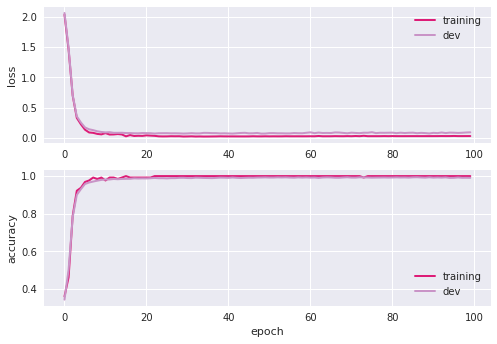

In [16]:
saver = tf.train.Saver()
best_valid_acc = 1e-10

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    steps_per_epoch = len(train_feat) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    
    training_accuracies = []
    valid_accuracies = []

    training_losses = []
    valid_losses = []
    
    for epoch in range(EPOCHS):
        
        for step in range(steps_per_epoch):
            batch_x, batch_y = training_dataset.next_batch(BATCH_SIZE)
            loss, accur = sess.run([train_op, accuracy_op],
                                   feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})        
        
        # training loss and accuracy after an epoch
        loss_tr, acc_tr = sess.run([loss_op, accuracy_op], 
                                   feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})        
        training_losses.append(loss_tr)
        training_accuracies.append(acc_tr)

        loss_valid, acc_valid = eval_data(valid_dataset)
        valid_accuracies.append(acc_valid)
        valid_losses.append(loss_valid)
        
        if acc_valid > best_valid_acc:                
                saver.save(sess, MODEL_NAME, global_step=step)
                best_valid_acc = acc_valid
        
        if epoch % 20 == 0:
            print('Epoch:{:d} train loss:{:.4f} valid loss:{:.4f} train accu:{:.4f} valid accu:{:.4f}'.format(
                    epoch, loss_tr, loss_valid, acc_tr, acc_valid))      
    
    print('Trained model saved to the disk.')
    plot_learning_curves(training_losses, training_accuracies, valid_losses, valid_accuracies)

### Generate additional training data
I generate an extra number of images by taking the original ones and apply a random rotation, translation, and shear operations. 

I use the function **transform_image** stored in utils.py. 
This function transforms images to generate new images, taking in the following arguments:
1. Image: original dataset of images
2. ang_range: Range of angles for rotation
3. shear_range: Range of values to apply affine transform to
4. trans_range: Range of values to apply translations over. 


This way we were able to double our training data. 

In [17]:
def display_augmented_images(image_dataset, augmented_data, n_rows):
    '''
    Simple utility function for displaying augmented images.
    '''
    plt.figure(figsize=(5,7.5))
    selected_classes = np.random.randint(0, 44, size=n_rows)
    image_number = 1
    for row in selected_classes:
        x_selected = image_dataset[np.argmax(y_train, axis=1) == row]
        index = 0 # print first image of each image category
        
        plt.subplot(n_rows, 2, image_number)
        plt.imshow(x_selected[index, :, :, :]) 
        plt.axis('off')
        plt.title('class: {}'.format(row)) 
        image_number += 1
        
        aug_selected = augmented_data[np.argmax(y_train, axis=1) == row]
        
        plt.subplot(n_rows, 2, image_number)
        plt.imshow(aug_selected[index, :, :, :]) 
        plt.axis('off')
        plt.title('class: {}'.format(row))
        image_number += 1
        
    plt.suptitle('Original Image (First Column) and Augmented Image (Second Column)')
    plt.show()

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


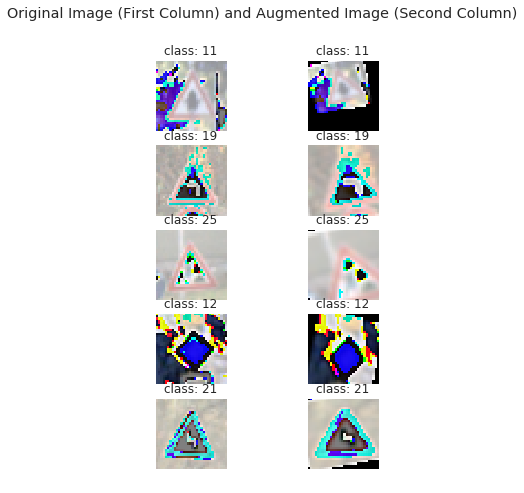

In [18]:
X_train_transform = np.zeros_like(X_train_norm)
y_train_transform = np.zeros_like(y_train)

for i in range(X_train_transform.shape[0]): #
    X_train_transform[i] = transform_image(X_train_norm[i], 20, 10, 5)
    y_train_transform[i] = y_train[i]        

display_augmented_images(X_train_norm, X_train_transform, 5)

Now I'm going to train the network in the new augmented dataset and check if it makes any improvement from the original dataset. 

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Epoch:0 train loss:2.0349 valid loss:2.1118 train accu:0.3125 valid accu:0.3352


'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Epoch:20 train loss:0.0182 valid loss:0.0791 train accu:1.0000 valid accu:0.9868


'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Epoch:40 train loss:0.0223 valid loss:0.0666 train accu:1.0000 valid accu:0.9932


'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Epoch:60 train loss:0.0259 valid loss:0.0724 train accu:1.0000 valid accu:0.9932


'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Epoch:80 train loss:0.0279 valid loss:0.0704 train accu:1.0000 valid accu:0.9932


'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

'./checkpoint_myneuralnet/MyNeuralNet.ckpt-244'

Trained model saved to the disk.


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


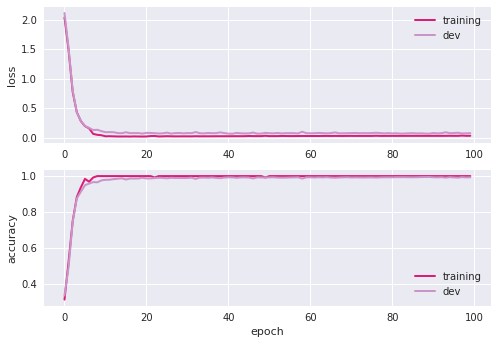

In [19]:
saver = tf.train.Saver()
best_valid_acc = 1e-10

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    steps_per_epoch = len(train_feat) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    
    training_accuracies = []
    valid_accuracies = []

    training_losses = []
    valid_losses = []
    
    for epoch in range(EPOCHS):
        
        for step in range(steps_per_epoch):
            batch_x, batch_y = training_dataset.next_batch(BATCH_SIZE)
            loss, accur = sess.run([train_op, accuracy_op],
                                   feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})        
        
        # training loss and accuracy after an epoch
        loss_tr, acc_tr = sess.run([loss_op, accuracy_op], 
                                   feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})        
        training_losses.append(loss_tr)
        training_accuracies.append(acc_tr)

        loss_valid, acc_valid = eval_data(valid_dataset)
        valid_accuracies.append(acc_valid)
        valid_losses.append(loss_valid)
        
        if acc_valid > best_valid_acc:                
                saver.save(sess, MODEL_NAME, global_step=step)
                best_valid_acc = acc_valid
        
        if epoch % 20 == 0:
            print('Epoch:{:d} train loss:{:.4f} valid loss:{:.4f} train accu:{:.4f} valid accu:{:.4f}'.format(
                    epoch, loss_tr, loss_valid, acc_tr, acc_valid))      
    
    print('Trained model saved to the disk.')
    plot_learning_curves(training_losses, training_accuracies, valid_losses, valid_accuracies)

The augmented dataset doesn't seem to make much difference in the results, but because it slightly increases the accuracty of the predictions in the validation dataset (from 99.24 to 99.32), we'll use this model to predict on the Test set. 

In [20]:
with tf.Session(graph = tf.Graph()) as sess:
    saver = tf.train.import_meta_graph('./checkpoint_myneuralnet/MyNeuralNet.ckpt-244.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./checkpoint_myneuralnet'))
        
    # Retrieve the Ops we 'remembered'.
    x = tf.get_collection("x")[0]
    y = tf.get_collection("y")[0]
    keep_prob = tf.get_collection("keep_prob")[0]
    logits = tf.get_collection('logits')[0]
    accuracy_op = tf.get_collection('accuracy_op')[0]
    loss_op = tf.get_collection('loss_op')[0]
        
    model_loss, model_perf = eval_data(testing_dataset)
    print('Test Dataset Classification Accuracy: {:.4f}'.format(model_perf))

Test Dataset Classification Accuracy: 0.9577


I tried also different structures:
1. 1st layer =6, 2nd=16, 3rd fully = 1024, 4th fully=512.
2. 1st layer =6, 2nd=16, 3rd fully = 512, 4th fully=258.

None of the above structures improved the previous model built with both layers 3rd and 4th fully connected with input 1024 and output 1024. 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


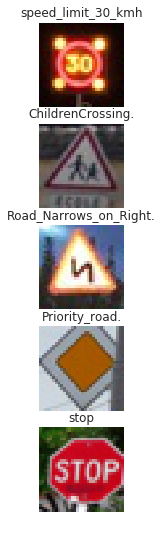

In [32]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import scipy.misc

labels = {0: 'Speed Limit 30 km/h',    
          1: 'Children Crossing',
          2: 'Road Narrows on Right',
          3: 'Priority Road',
          4: 'Stop'}


resized_image_data = [(resize_image(image), image[:-4]) 
                          for image in os.listdir(TEST_IMAGES)]
   
display_new_images(resized_image_data)

### Predict the Sign Type for Each Image

In [33]:
# Print results when predicting with new data    
def print_result(ground_truth, top_k_prob, top_k_indices):
    class_names = pd.read_csv('./signnames.csv')['SignName'].values
    index = 0
    img_index = 0
    plt.figure(figsize=(14, 11))
    gs = gridspec.GridSpec(5, 2, width_ratios=[1, 0.45]) 
    for key in ground_truth:
        img, tag = resized_image_data[img_index]
        img_index += 1
        plt.subplot(gs[index])
        plt.imshow(img)
        plt.axis('off')
        plt.title(tag)
        index += 1

        plt.subplot(gs[index])
        plt.barh(np.arange(1, 6, 1), 
                 top_k_prob[key, :],
                 0.8, 
                 color='#dd1c77')
        plt.yticks(np.arange(1, 6, 1), class_names[top_k_indices[key, :]])
        index += 1
    plt.suptitle('Test Images and their Softmax Probabilities')
    plt.show()
    

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


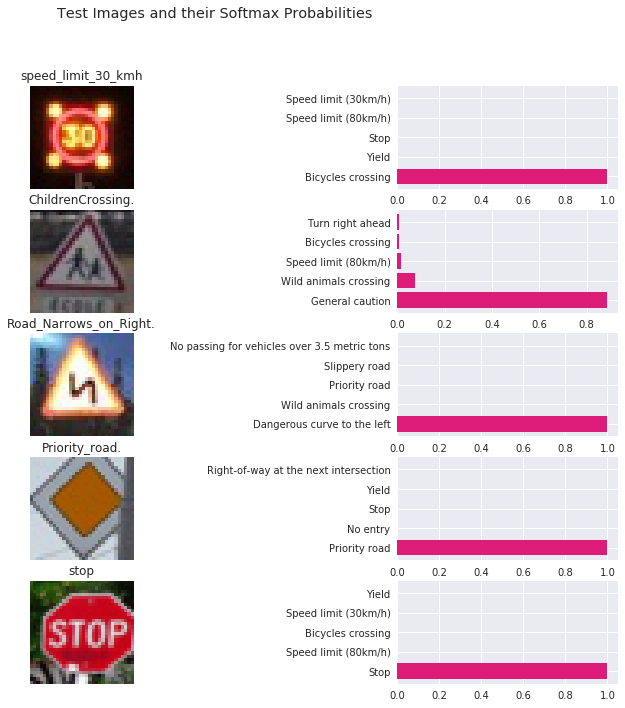

In [35]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Pre-processing pipeline
resized_images = [img_and_name[0] for img_and_name in resized_image_data]
X_test_new_dataset = min_max_normalization(np.array(resized_images))


with tf.Session(graph = tf.Graph()) as sess:
    saver = tf.train.import_meta_graph(
        './checkpoint_myneuralnet/MyNeuralNet.ckpt-244.meta')
    saver.restore(sess,  tf.train.latest_checkpoint('./checkpoint_myneuralnet'))
        
    # Retrieve the Ops we 'remembered'.
    x = tf.get_collection("x")[0]
    y = tf.get_collection("y")[0]
    keep_prob = tf.get_collection("keep_prob")[0]
    logits = tf.get_collection('logits')[0]
    softmax = tf.nn.softmax(logits)
    normalized_prob = sess.run(softmax, feed_dict={x: X_test_new_dataset, keep_prob: 1.0})    
    top_k_op = tf.nn.top_k(normalized_prob, k=5)
    top_k_results = sess.run(top_k_op)
    
    # show predictions with their probabilities
    print_result(labels, top_k_results.values, top_k_results.indices)


In [ ]:
##
class_names = pd.read_csv('./signnames.csv')['SignName'].values

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

### Question 1
Describe how you preprocessed the data. Why did you choose that technique?

##### Answer
1. I normalized the image data using **MinMax Scaling**, which is a recommended method for neural networks and scales my images on a scale of 0 to 1. 
2. I tried applying **greyscale** to my images but I didn't find it to improve my results. 
3. I applied **One-Hot-Encoding** to my labels, which convert them from numbers to binary vectors. 

### Question 2
Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?

##### Answer
1. In order to prevent overfitting, I shuffled my images and then randomly separated 20% of it to use cross-validation. This way I could evaluate the performance of the model without using the test set.
2. I first trained the model using the images provide in the train dataset. This yield 99,42% of accuracy in the validation dataset and 95,43% in the test dataset. 
3. Then I created additional data by performing Rotation, Translation and Shear transformations to my original train images. This doubled my training set. I retrained my model using the augmented dataset and got the following results: ....

### Question 3
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom.

##### Answer
Using similar architecture as LeNet, I started my network building a simple structure with standard parameters. Then I tried a few other combinations of parameters and also augmented the training dataset by including transformations of the original images. After all these testings, the best model was a result of the following architecture:

- 1st Layer: 
    - Convolution with 5x5 kernel, stride of 1, depth of 6, VALID padding.
    - Relu Activation
    - Max pooling layer: 2x2 kernal with stride of 2
- 2nd Layer: 
    - Convolution with 5x5 kernel, stride of 1, depth of 16, VALID padding.
    - Relu Activation
    - Max pooling layer: 2x2 kernal with stride of 2
- 3rd Layer:
    - Fully connected layer of size 1024
    - Relu Activation
    - Dropout layer with dropout probability 0.5
- 4th Layer:
    - Fully connected layer of size 1024
    - Dropout layer with dropout probability 0.5

- 5th Layer:
    - Fully connected layer of size 1024
    - Softmax layer with size 43

### Question 4
How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)

##### Answer
After running the network, I compared the logits with the true labels and calculated the cross entropy to measure the differences. 
I included a regularization cost of 1e-6.

As Optimizer, I used AdamOptimizer

Other parameters I used during the training:
- Learning Rate: 1e-3
- Epochs: 100
- Batch Size: 128


### Question 5
What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem.

##### Answer
As initial approach, I used LeNet architecture as it had it very recent from the SDCE classes. LeNet is a multi-stage architectures that automatically learn hierarchies of invariant features, and it's well-known for being a robust and stable model in recognizing images. 

The system yielded an accuracy of 99.24 on the pre-processed train data. I tuned some of the parameters of the network, particularly the input and output sized for layers 3 and 4, but ultimately I ended up using the default parameters chosen as these yield the best results. 

I added augmented data from the transformations performed on of the original images and then retrain the network. This slightly increased the accuracy of my model 1 percentual point, which is not very significant. 

Using the model trained on the augmented data to predict on the test data, I got 95,7% of accuracy, which is still very high and indicates that the model generalizes well.

By looking at the loss & accuracy plots, there might be a possibility to improve the models by expanding the number of layers, fine tuning some of the parameters, or bring more dataset for the training. 

It's worth noting also that I started training the network on my local machine but after long waits I decided to use AWS to launch a EC2 GPU instance. This was a great choice as it helped me train the differently tuned networks ~10x faster. 


### Question 6
Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook.

##### Answer
I chose a mix of 5 random images that I found online. I pick some of them specially difficult, like the 'Speed Limit 30km/h' sign which had 4 bright lights around it. 

Check Step 3 to view the images selected. 


###  Question 7
Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.
NOTE: You could check the accuracy manually by using signnames.csv (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in signnames.csv and see if it matches the sign from the image.

##### Answer
My model was able to predict 3 out of 5 correct, which is 60% of accuracy. This is very low compared to the 99% of accuracy achieved during training, validation and testing. 
Looking at the 2 images that were not predicted correctly:
- The speed limit 30km/h sign had the difficulty of the lights in the edges of the sign. This confused my algorithm to think that was part of the sign, and ended up classifying it as Bicycle Crossing Sign, wchih has a squared shape. Using canny edge detection and region masking in the pre-processing part may have helped the algorithm to focus on the sign and not its peripheria, and hence properly classify the sign. 
- The Children Crossing sign was incorrectly classified as General Caution sign. The algorithm wasn't completely sure about its prediction, and thought it could also be a Wild Animal Crossing sing. Interestingly, it's not far from the correct classifier, as they all share shape and colors. The algorithm wasn't able to clearly detect the images of the kids crossing inside the triangle. This could be because the algorithm was trained with low quality, transformed, and blurried images, which may have prevented it to learn the correct shape of the inside of the sign. 


###  Question 8
Use the model's softmax probabilities to visualize the certainty of its predictions, tf.nn.top_k could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)

##### Answer
In 4 out of the 5 images tested, the algorithm makes its predictions with the highest probability (100%). 3 were correct, but 1 of them was incorrect, which was the speed limit sign. This should be handled carefully as in this case, given that the images doesn't look like it's predicted class, the algorithm should not have been not been so confident on the prediction but offered a range of lower probabilities corresponding to different classes. 